### A notebook testing the difference in execution time of the MNIST classification using a simple CNN on the CPU vson the dedicated GPU (NVIDIA GeForce RTX 4050)

In [ ]:
import os
import time
import torch
import engine, model_builder
from utils import plot_predictions, save_model

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from torchvision import transforms

Set up hyperparameters

In [5]:
cuda = "cuda"
cpu  = "cpu"
num_classes = 10 #MNIST dataset containing handwritten digits from 1-9

#TODO: learn automatic hyperparameter tuning
LR = 0.001 
NUM_EPOCHS = 10
BATCH_SIZE = 64

# note: you can't change a constant value - just access it  

Download the dataset

In [6]:
#TODO: Play with other datasets
#TODO: Play with transforms and augmentations

basic_transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root="dataset/", download=True, train=True,
                               transform=basic_transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False,
                               transform=basic_transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

Instantiate the model and create the GPU instance

In [7]:
#TODO: create more models/architectures and play with them

model = model_builder.CNN(in_channels=1, num_classes=num_classes)
model_gpu = model.to(cuda)

#TODO: test different loss functions + refresh theory
loss_fn = torch.nn.CrossEntropyLoss()

#TODO: test other optimizers + reftesh theory
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

Train on GPU and time the execution

In [8]:
start = time.time()
GPU_run = engine.train(model=model_gpu,
             train_dataloader=train_loader,
             test_dataloader=test_loader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=cuda)
end = time.time()
print(f"Total training time on GPU: {end-start} seconds.")

 10%|█         | 1/10 [00:12<01:54, 12.68s/it]

Epoch: 1 | train_loss: 0.3904 | train_acc: 0.8859 | test_loss: 0.1344 | test_acc: 0.9585 | 


 20%|██        | 2/10 [00:32<02:13, 16.73s/it]

Epoch: 2 | train_loss: 0.1120 | train_acc: 0.9672 | test_loss: 0.0797 | test_acc: 0.9768 | 


 30%|███       | 3/10 [00:47<01:50, 15.84s/it]

Epoch: 3 | train_loss: 0.0819 | train_acc: 0.9757 | test_loss: 0.0785 | test_acc: 0.9750 | 


 40%|████      | 4/10 [01:01<01:31, 15.30s/it]

Epoch: 4 | train_loss: 0.0706 | train_acc: 0.9789 | test_loss: 0.0568 | test_acc: 0.9834 | 


 50%|█████     | 5/10 [01:14<01:12, 14.55s/it]

Epoch: 5 | train_loss: 0.0645 | train_acc: 0.9806 | test_loss: 0.0555 | test_acc: 0.9821 | 


 60%|██████    | 6/10 [01:28<00:57, 14.37s/it]

Epoch: 6 | train_loss: 0.0591 | train_acc: 0.9821 | test_loss: 0.0536 | test_acc: 0.9836 | 


 70%|███████   | 7/10 [01:42<00:42, 14.14s/it]

Epoch: 7 | train_loss: 0.0550 | train_acc: 0.9834 | test_loss: 0.0495 | test_acc: 0.9844 | 


 80%|████████  | 8/10 [02:12<00:38, 19.36s/it]

Epoch: 8 | train_loss: 0.0510 | train_acc: 0.9846 | test_loss: 0.0505 | test_acc: 0.9835 | 


 90%|█████████ | 9/10 [02:50<00:24, 24.96s/it]

Epoch: 9 | train_loss: 0.0480 | train_acc: 0.9850 | test_loss: 0.0451 | test_acc: 0.9863 | 


100%|██████████| 10/10 [03:28<00:00, 20.80s/it]

Epoch: 10 | train_loss: 0.0455 | train_acc: 0.9859 | test_loss: 0.0429 | test_acc: 0.9858 | 
Total training time on GPU: 208.02359223365784 seconds.


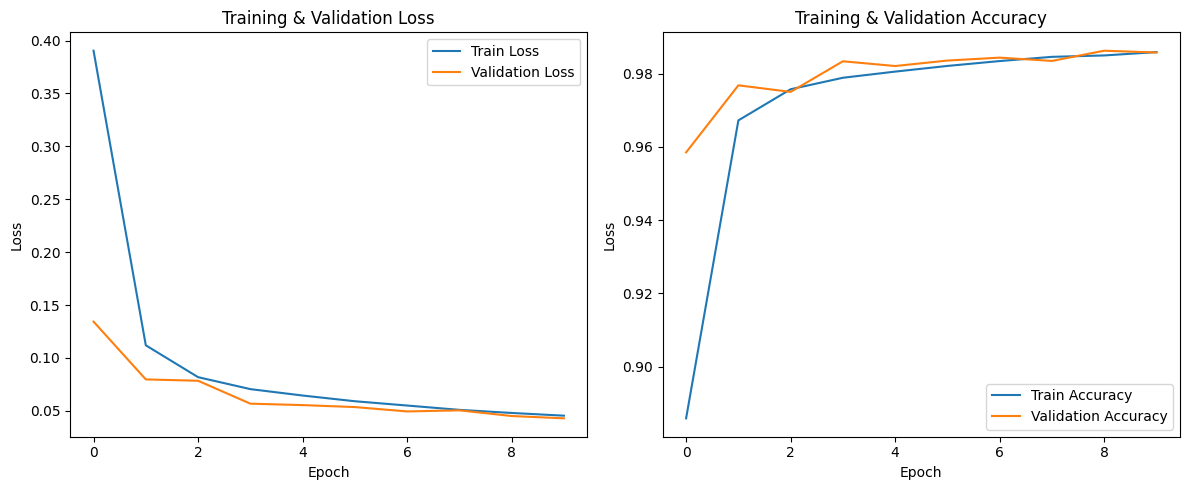

In [12]:
GPU_train_loss = GPU_run["train_loss"]
GPU_train_acc = GPU_run["train_acc"]
GPU_test_loss = GPU_run["test_loss"]
GPU_test_acc = GPU_run["test_acc"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss subplot
axes[0].plot(GPU_train_loss, label="Train Loss")
axes[0].plot(GPU_test_loss, label="Validation Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training & Validation Loss")
axes[0].legend()

# Accuracy subplot
axes[1].plot(GPU_train_acc, label="Train Accuracy")
axes[1].plot(GPU_test_acc, label="Validation Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].set_title("Training & Validation Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()

In [15]:
utils.plot_predictions(model=model_gpu,
                       data_loader=test_loader,
                       device=cuda)
    


AttributeError: module 'utils' has no attribute 'plot_predictions'

Same but with CPU

In [ ]:
model_cpu = model.to(cpu)
optimizer_cpu = torch.optim.Adam(model_cpu.parameters(), lr=LR)

In [ ]:
start = time.time()
engine.train(model=model_cpu,
             train_dataloader=train_loader,
             test_dataloader=test_loader,
             loss_fn=loss_fn,
             optimizer=optimizer_cpu,
             epochs=NUM_EPOCHS,
             device="cpu")
end = time.time()
print(f"Total training time on CPU: {end-start} seconds.")

In [ ]:
GPU = 175.37
CPU = 436.46
CPU/GPU

## #TODO: HERE VIZUALIZATIONS OF LOSS CURVES, OF ACCURACIES + EXAMPLES OF INFERENCE VIZ